## Kmeans Notebook

In [34]:
import numpy as np
import pandas as pd
import random
import sys
from PIL import Image
import matplotlib.image as mpimg
from skimage import color
from skimage import io
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

In [35]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [36]:
%run kmeans

In [37]:
grades=[92.65,93.87,74.06,86.94,92.26,94.46,92.94,80.65,92.86,85.94,91.79,95.23,85.37,87.85,87.71,93.03]
k=4
grades=np.array(grades).reshape(-1,1)
centroids,labels=kmeans(grades,k,centroids='kmeans++')
print(centroids.reshape(1,-1))
print(labels)

[[93.23222222 74.06       86.762      80.65      ]]
[0 0 1 2 0 0 0 3 0 2 0 0 2 2 2 0]


In [38]:
len(grades)

16

In [39]:
grades=[92.65,93.87,74.06,86.94,92.26,94.46,92.94,80.65,92.86,85.94,91.79,95.23,85.37,87.85,87.71,93.03]
grades=[int(g) for g in grades]

In [40]:
grades

[92, 93, 74, 86, 92, 94, 92, 80, 92, 85, 91, 95, 85, 87, 87, 93]

In [41]:
grades=[111,222,230,203,3,4,4,7,7,7]
k=4
grades=np.array(grades).reshape(-1,1)
centroids,labels=kmeans(grades,k)
print(centroids.reshape(1,-1))
print(labels)

[[ nan 79.8  nan  nan]]
[0 0 0 0 0 0 0 0 0 0]


[[11.   1.5]
 [ 2.  10.5]
 [ 2.   1.5]
 [11.  10.5]]


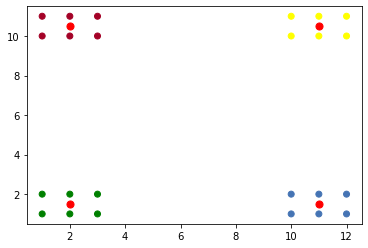

In [42]:
X=np.array([[1,1],[1,2],[1,10],[1,11],[3,1],[3,2],[3,10],[3,11],[2,1],[2,2],[2,10],[2,11],[10,1],[10,2],[10,10],[10,11],[11,1],[11,2],[11,10],[11,11],[12,1],[12,2],[12,10],[12,11]])
centroids, labels = kmeans(X, 4,centroids='kmeans++',max_iter=1)
print(centroids)
colors=np.array(['#4574B4','#A40227','green','yellow'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()
plt.show()

In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score

cancer=load_breast_cancer()
X=cancer.data
Y=cancer.target
sc=StandardScaler()
X=sc.fit_transform(X)

centroids, labels = kmeans(X, 2,centroids='kmeans++',tolerance=0.0001)
confusion_matrix(Y, labels),accuracy_score(Y, (1-labels))

(array([[ 37, 175],
        [344,  13]]),
 0.9121265377855887)

[[-0.26633264 -0.19427375]
 [ 0.3866294   0.27030536]]


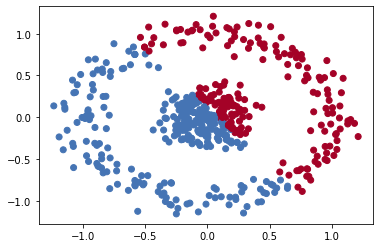

In [44]:
from sklearn.datasets import make_circles
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
centroids, labels = kmeans(X, 2,centroids='kmeans++')
print(centroids)
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show()

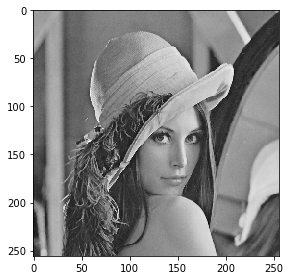

In [45]:
image = io.imread('/Users/surbhiprasad/dsa/lena.png')
io.imshow(image)
io.show()

rows = image.shape[0]
cols = image.shape[1]
zeros=np.zeros(len(np.array(image).reshape(-1,1)))
combined = np.hstack((np.array(image).reshape(-1,1), zeros.reshape(-1,1)))
X=image

In [46]:
image.shape

(256, 256)

In [47]:
h,w=image.shape


In [48]:
combined.shape

(65536, 2)

In [49]:
k=8
centroids, labels = kmeans(combined, k=k,centroids='kmeans++', tolerance=.01)
centroids = centroids.astype(np.uint8)
X = centroids[labels] # reassign all points
final_image_pixels=np.array([x[0] for x in X])
img_ = Image.fromarray(final_image_pixels.reshape(h,w), 'L')
img_.show()
img_.save('lena.png')

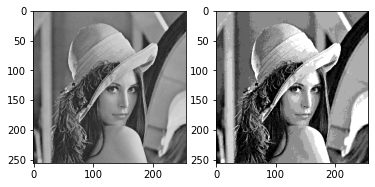

<Figure size 7200x7200 with 0 Axes>

In [50]:
f, axarr = plt.subplots(1,2)
plt.figure(figsize=(100,100))
axarr[0].imshow(image,cmap='gray')
axarr[1].imshow(img_,cmap='gray')

In [51]:
from PIL import Image
image = Image.open('/Users/surbhiprasad/dsa/bird.png')
width, height = image.size
pixel_values = list(image.getdata())
image.save('originalbird.png')

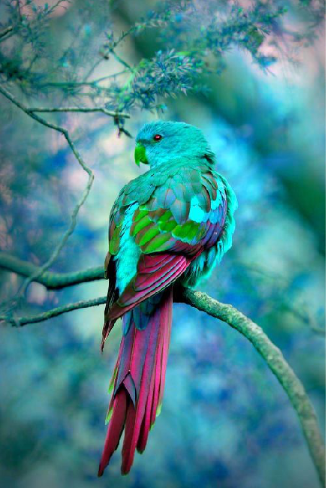

In [52]:
image

In [53]:
width, height

(326, 488)

In [54]:
(np.array(pixel_values)).shape

(159088, 4)

In [55]:
k=2
centroids, labels = kmeans(np.array(pixel_values), k=k, centroids='kmeans++', max_iter=30)
centroids = centroids.astype(np.uint8)
X = centroids[labels] # reassign all points

img_ = Image.fromarray(X.reshape((height,width,4)))
img_.show()
img_.save('bird2.png')

In [297]:
image_a = io.imread('/Users/surbhiprasad/dsa/kmeans-surbhi33/originalbird.png')
image8 = io.imread('/Users/surbhiprasad/dsa/kmeans-surbhi33/bird8.png')

image16 = io.imread('/Users/surbhiprasad/dsa/kmeans-surbhi33/bird16.png')
image32 = io.imread('/Users/surbhiprasad/dsa/kmeans-surbhi33/bird32.png')

image4 = io.imread('/Users/surbhiprasad/dsa/kmeans-surbhi33/bird4.png')
image2 = io.imread('/Users/surbhiprasad/dsa/kmeans-surbhi33/bird2.png')
image64 = io.imread('/Users/surbhiprasad/dsa/kmeans-surbhi33/bird64.png')


Text(0.5, 1.0, 'K=64 Compressed Image')

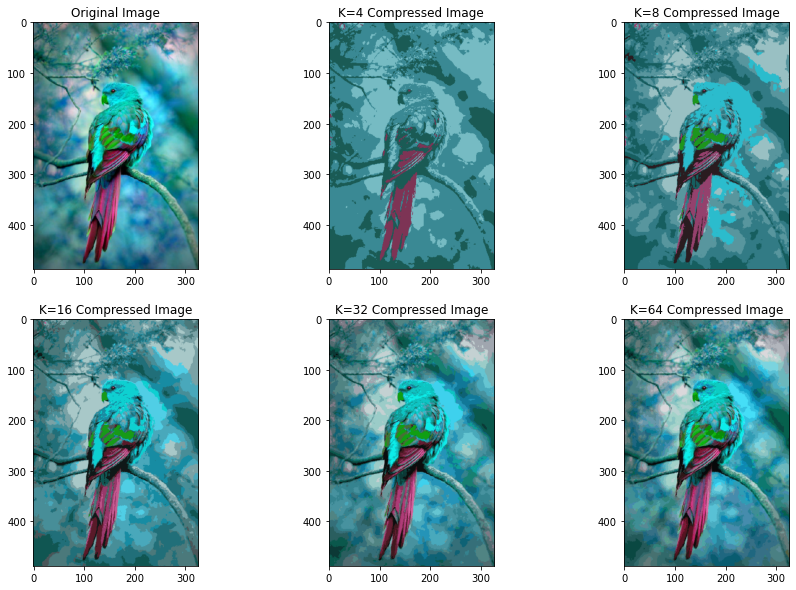

In [302]:
f, axarr = plt.subplots(2,3,figsize=(15,10))
axarr[0,0].imshow(image_a)
axarr[0,0].set_title('Original Image')
axarr[0,1].imshow(image4)
axarr[0,1].set_title('K=4 Compressed Image')
axarr[0,2].imshow(image8)
axarr[0,2].set_title('K=8 Compressed Image')
axarr[1,0].imshow(image16)
axarr[1,0].set_title('K=16 Compressed Image')
axarr[1,1].imshow(image32)
axarr[1,1].set_title('K=32 Compressed Image')
axarr[1,2].imshow(image64)
axarr[1,2].set_title('K=64 Compressed Image')


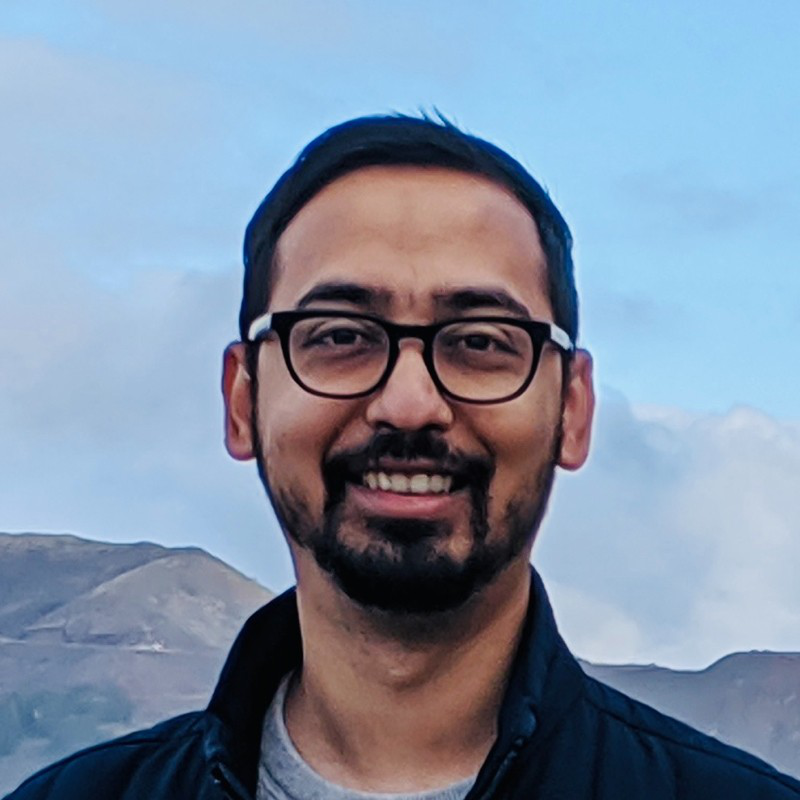

In [184]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/dsa/arpit.jpeg')
width, height = im.size
pixel_values = list(im.getdata())
im

In [210]:
k=64
centroids, labels = kmeans(np.array(pixel_values), k=k, centroids='kmeans++', max_iter=30)
centroids = centroids.astype(np.uint8)
X = centroids[labels] # reassign all points

img_ = Image.fromarray(X.reshape((height,width,3)))
img_.show()
img_.save('arpitcompres64.png')

In [211]:
image_a = io.imread('/Users/surbhiprasad/dsa/arpit.jpeg')
image8 = io.imread('/Users/surbhiprasad/dsa/kmeans-surbhi33/arpitcompres8.png')

image16 = io.imread('/Users/surbhiprasad/dsa/kmeans-surbhi33/arpitcompres16.png')
image32 = io.imread('/Users/surbhiprasad/dsa/kmeans-surbhi33/arpitcompres32.png')

image4 = io.imread('/Users/surbhiprasad/dsa/kmeans-surbhi33/arpitcompres4.png')
image2 = io.imread('/Users/surbhiprasad/dsa/kmeans-surbhi33/arpitcompres2.png')
image64 = io.imread('/Users/surbhiprasad/dsa/kmeans-surbhi33/arpitcompres64.png')


Text(0.5, 1.0, 'K=32 Compressed Image')

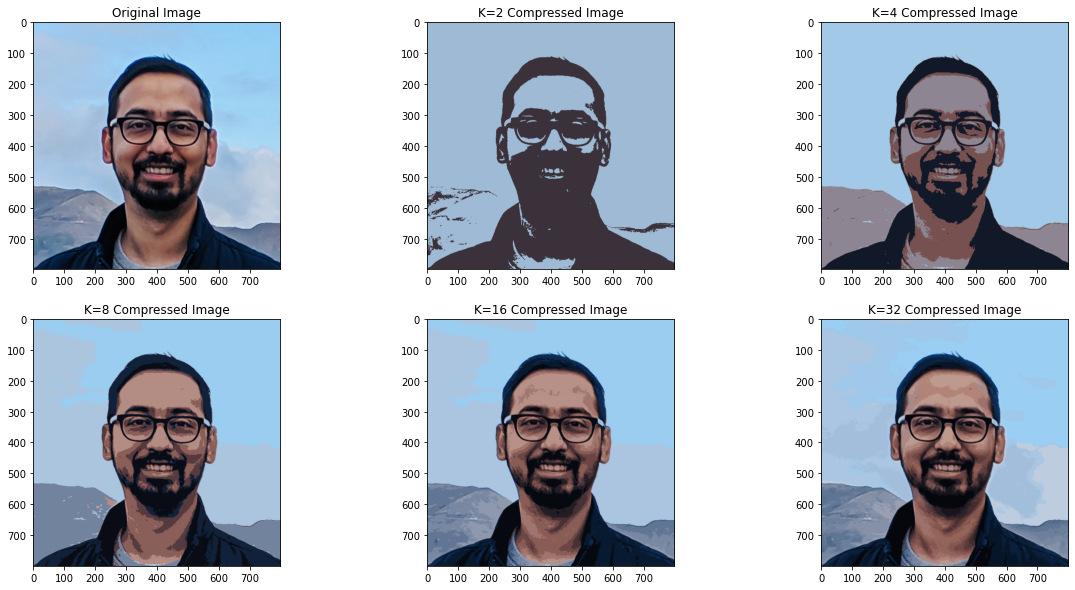

In [217]:
f, axarr = plt.subplots(2,3,figsize=(20,10))
axarr[0,0].imshow(image_a)
axarr[0,0].set_title('Original Image')
axarr[0,1].imshow(image2)
axarr[0,1].set_title('K=2 Compressed Image')
axarr[0,2].imshow(image4)
axarr[0,2].set_title('K=4 Compressed Image')
axarr[1,0].imshow(image8)
axarr[1,0].set_title('K=8 Compressed Image')
axarr[1,1].imshow(image16)
axarr[1,1].set_title('K=16 Compressed Image')
axarr[1,2].imshow(image32)
axarr[1,2].set_title('K=32 Compressed Image')

[[59.83333333 42.16666667]
 [30.83333333 74.66666667]
 [43.2        16.7       ]
 [37.875      53.5       ]]


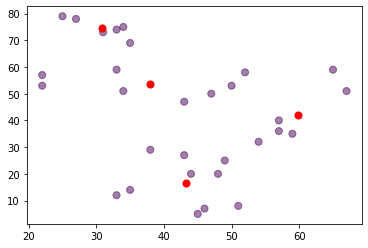

In [33]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = DataFrame(Data,columns=['x','y'])
  
#kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans(X, 4,centroids='kmeans++')[0]
print(centroids)

X=np.array([[df['x'][i],df['y'][i]] for i in range(len(df['x']))])

plt.scatter(df['x'], df['y'], c= kmeans(X, 4)[1] ,s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [ ]:

from sklearn.datasets import make_circles
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
cluster = SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
labels = cluster.fit_predict(X)  # pass X not similarity matrix

print(labels)
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.savefig("/Users/parrt/Desktop/nested-spectral.png", dpi=200)
plt.show()

 ## Elbow Method

In [56]:
def loss_elbow(ctds, labels, data):
        dists = distance_sqrt(data, ctds)
        loss = 0.0
        N, D = data.shape
        for i in range(N):
            loss = loss + np.square(dists[i][labels[i]])
        
        return loss

In [57]:
def elbow(data, max_K=15):
        distortions = []
        K = range(1,max_K)
        for k in K:
            centds,labels = kmeans(X, k,centroids='kmeans++')
            distortions.append(loss_elbow(centds,labels,X))
        return distortions

In [58]:
X=np.array([[1,1],[1,2],[1,10],[1,11],[3,1],[3,2],[3,10],[3,11],[2,1],[2,2],[2,10],[2,11],[10,1],[10,2],[10,10],[10,11],[11,1],[11,2],[11,10],[11,11],[12,1],[12,2],[12,10],[12,11]])
centroids, labels = kmeans(X, 4,centroids='kmeans++',max_iter=1)


In [59]:
Y=elbow(X)

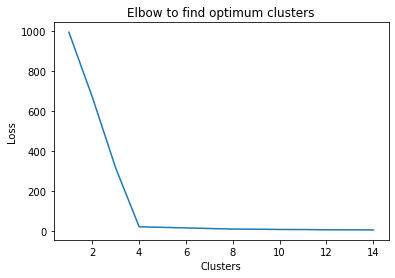

In [60]:
plt.plot(np.arange(14) + 1, Y)
plt.title("Elbow to find optimum clusters")
plt.xlabel("Clusters")
plt.ylabel("Loss")
plt.show()

In [71]:
centroids, labels = kmeans(combined, k=k,centroids='kmeans++', tolerance=.01)


In [72]:
Y=elbow(combined)

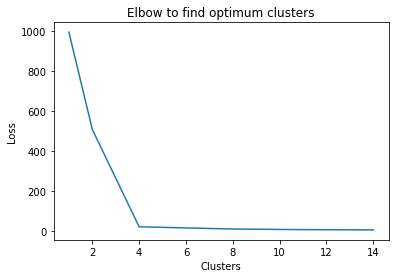

In [73]:
plt.plot(np.arange(14) + 1, Y)
plt.title("Elbow to find optimum clusters")
plt.xlabel("Clusters")
plt.ylabel("Loss")
plt.show()

In [68]:
combined.shape

(65536, 2)